# pytorch

* 아래 사이트를 참조하여 pytorch를 설치하세요.  
https://pytorch.org/
* 다른 프레임워크(예컨데 텐서플로우, 케라스)에 이미 익숙하다면 그것을 사용하여도 좋습니다. 다만 강의는 pytorch를 기반으로 진행합니다.

# MNIST
* 2개의 히든 레이어를 도입한다.
* input layer는 28*28개의 노드
* hidden layer의 노드의 수는 자유롭게 설정해도 좋다. 
* output은 10개(0~9)로 설정한다.

#### test data를 예측하여 정확도를 최대가 되도록 학습하여라. 
* 제출 시 test data의 정확도를 출력하여 제출하세요.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

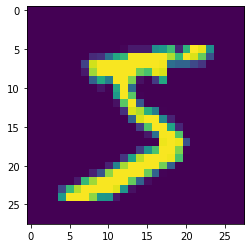

In [3]:
plt.imshow(x_train[0])

In [4]:
class Mish(tf.keras.layers.Activation):
    def __init__(self, activation, **kwargs):
        super(Mish, self).__init__(activation, **kwargs)
        self.__name__ = 'Mish'

In [5]:
def mish(x):
    return x * tf.keras.backend.tanh(tf.keras.backend.softplus(x))

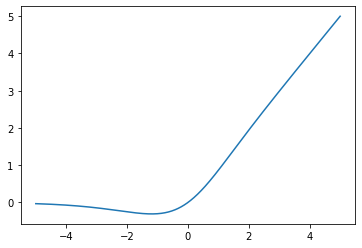

In [7]:
plt.plot(np.linspace(-5,5,1000),[mish(x) for x in np.linspace(-5,5,1000)]) #relu와 유사한 activation function

In [8]:
tf.keras.utils.get_custom_objects().update({'mish': Mish(mish)})

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='mish'),
    tf.keras.layers.Dense(64, activation='mish'),
    tf.keras.layers.Dense(10)
])

In [10]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history=model.fit(x_train[1000:], y_train[1000:], epochs=10, validation_data=(x_train[:1000], y_train[:1000])) #나머지 1000개는 validation data로 사용

Epoch 1/10
1844/1844 [==============================] - 6s 3ms/step - loss: 0.2318 - accuracy: 0.9317 - val_loss: 0.1528 - val_accuracy: 0.9570
Epoch 2/10
1844/1844 [==============================] - 5s 3ms/step - loss: 0.0978 - accuracy: 0.9703 - val_loss: 0.0931 - val_accuracy: 0.9760
Epoch 3/10
1844/1844 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9791 - val_loss: 0.0947 - val_accuracy: 0.9740
Epoch 4/10
1844/1844 [==============================] - 5s 3ms/step - loss: 0.0473 - accuracy: 0.9843 - val_loss: 0.0831 - val_accuracy: 0.9770
Epoch 5/10
1844/1844 [==============================] - 5s 3ms/step - loss: 0.0354 - accuracy: 0.9883 - val_loss: 0.1014 - val_accuracy: 0.9730
Epoch 6/10
1844/1844 [==============================] - 5s 3ms/step - loss: 0.0272 - accuracy: 0.9904 - val_loss: 0.0887 - val_accuracy: 0.9800
Epoch 7/10
1844/1844 [==============================] - 5s 3ms/step - loss: 0.0232 - accuracy: 0.9919 - val_loss: 0.1287 - val_accuracy:

In [14]:
history2=model2.fit(x_train[1000:], y_train[1000:], epochs=10, validation_data=(x_train[:1000], y_train[:1000]))

Epoch 1/10
1844/1844 [==============================] - ETA: 0s - loss: 0.2430 - accuracy: 0.92 - 5s 3ms/step - loss: 0.2429 - accuracy: 0.9295 - val_loss: 0.1555 - val_accuracy: 0.9490
Epoch 2/10
1844/1844 [==============================] - 5s 3ms/step - loss: 0.1032 - accuracy: 0.9681 - val_loss: 0.1206 - val_accuracy: 0.9630
Epoch 3/10
1844/1844 [==============================] - 5s 2ms/step - loss: 0.0733 - accuracy: 0.9773 - val_loss: 0.1053 - val_accuracy: 0.9710
Epoch 4/10
1844/1844 [==============================] - 5s 3ms/step - loss: 0.0565 - accuracy: 0.9819 - val_loss: 0.1018 - val_accuracy: 0.9740
Epoch 5/10
1844/1844 [==============================] - 5s 3ms/step - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.0834 - val_accuracy: 0.9750
Epoch 6/10
1844/1844 [==============================] - 5s 3ms/step - loss: 0.0352 - accuracy: 0.9879 - val_loss: 0.1202 - val_accuracy: 0.9700
Epoch 7/10
1844/1844 [==============================] - 5s 3ms/step - loss: 0.0291 - accuracy:

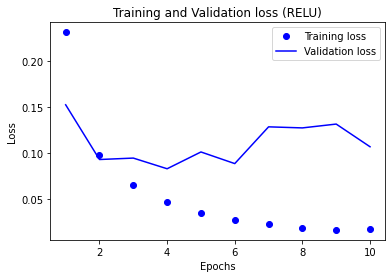

In [15]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation loss (RELU)')
plt.legend()
plt.show()

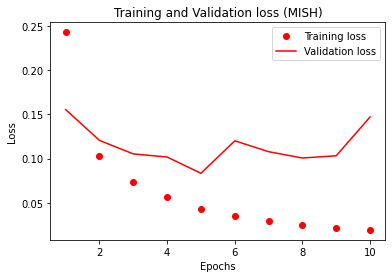

In [16]:
loss2=history2.history['loss']
val_loss2=history2.history['val_loss']
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss2, 'ro', label='Training loss')
plt.plot(epochs, val_loss2, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation loss (MISH)')
plt.legend()
plt.show()

## mish activation
https://arxiv.org/abs/1908.08681

relu에 비해 계산량이 많지만 loss landscape를 smoothing 하는 효과가 있다고 주장 -> 초기값에 보다 덜 민감하고 안정적임,

실제 학습을 시켜보니 relu에 비해 validation loss가 일정하게 감소하고 overfitting도 덜함 
 

# test data에 대한 정확도

In [17]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy(RELU):', test_acc)

313/313 - 0s - loss: 0.0830 - accuracy: 0.9795

Test accuracy(RELU): 0.9794999957084656


In [18]:
test_loss2, test_acc2 = model2.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy(MISH):', test_acc2)

313/313 - 0s - loss: 0.1115 - accuracy: 0.9752

Test accuracy(MISH): 0.9751999974250793
